In [64]:
import numpy as np
import cv2
import glob
import os
from sklearn.cluster import KMeans
from tqdm import tqdm

In [215]:
def findnn(D1, D2):
    """
    :param D1: NxD matrix containing N feature vectors of dim. D
    :param D2: MxD matrix containing M feature vectors of dim. D
    :return:
        Idx: N-dim. vector containing for each feature vector in D1 the index of the closest feature vector in D2.
        Dist: N-dim. vector containing for each feature vector in D1 the distance to the closest feature vector in D2
    """
    N = D1.shape[0]
    M = D2.shape[0]  # [k]

    # Find for each feature vector in D1 the nearest neighbor in D2
    Idx, Dist = [], []
    for i in range(N):
        minidx = 0
        mindist = np.linalg.norm(D1[i, :] - D2[0, :])
        for j in range(1, M):
            d = np.linalg.norm(D1[i, :] - D2[j, :])

            if d < mindist:
                mindist = d
                minidx = j
        Idx.append(minidx)
        Dist.append(mindist)
    return Idx, Dist

In [110]:
def grid_points(img, nPointsX, nPointsY, border):
    """
    :param img: input gray img, numpy array, [h, w]
    :param nPointsX: number of grids in x dimension
    :param nPointsY: number of grids in y dimension
    :param border: leave border pixels in each image dimension
    :return: vPoints: 2D grid point coordinates, numpy array, [nPointsX*nPointsY, 2]
    """
    vPoints = None  # numpy array, [nPointsX*nPointsY, 2]

    # todo
    ...
    xx = np.linspace(0+border, H-border, nPointsX)
    yy = np.linspace(0+border, W-border, nPointsY)

    xv, yv = np.meshgrid(xx, yy)
    
    xv = xv.reshape(1, nPointsX*nPointsY)
    yv = yv.reshape(1, nPointsX*nPointsY)
    
    vPoints = np.concatenate([xv, yv], 0).T
    
    return vPoints

In [111]:
img
nPointsX = 10
nPointsY = 10 
border = 8

vpoints = grid_points(img, nPointsX, nPointsY, border)

In [112]:
vpoints

array([[  8.        ,   8.        ],
       [ 26.88888889,   8.        ],
       [ 45.77777778,   8.        ],
       [ 64.66666667,   8.        ],
       [ 83.55555556,   8.        ],
       [102.44444444,   8.        ],
       [121.33333333,   8.        ],
       [140.22222222,   8.        ],
       [159.11111111,   8.        ],
       [178.        ,   8.        ],
       [  8.        ,  37.22222222],
       [ 26.88888889,  37.22222222],
       [ 45.77777778,  37.22222222],
       [ 64.66666667,  37.22222222],
       [ 83.55555556,  37.22222222],
       [102.44444444,  37.22222222],
       [121.33333333,  37.22222222],
       [140.22222222,  37.22222222],
       [159.11111111,  37.22222222],
       [178.        ,  37.22222222],
       [  8.        ,  66.44444444],
       [ 26.88888889,  66.44444444],
       [ 45.77777778,  66.44444444],
       [ 64.66666667,  66.44444444],
       [ 83.55555556,  66.44444444],
       [102.44444444,  66.44444444],
       [121.33333333,  66.44444444],
 

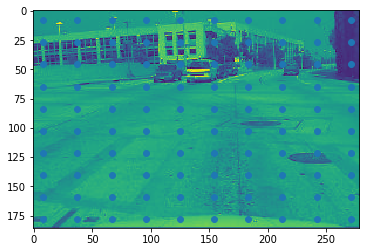

In [109]:
plt.scatter(vpoints.T[1], vpoints.T[0])
plt.imshow(img)

In [108]:
img.shape

(186, 279)

In [104]:
vpoints.T[0].shape

(100,)

In [6]:
img.shape

(186, 279)

In [8]:
H, W = img.shape

In [10]:
border = 8
nPointsX = 10
nPointsY = 10

In [79]:
W

279

In [80]:
xx = np.linspace(0+border, H-border, nPointsX)
yy = np.linspace(0+border, W-border, nPointsY)

xv, yv = np.meshgrid(xx, yy)

np.concatenate([xv.reshape(1,100),yv.reshape(1,100)], 0).T.shape

In [81]:
xv.shape

(10, 10)

In [83]:
xv.reshape(-1).shape

(100,)

In [86]:
yv.reshape(1,100)

array([[  8.        ,   8.        ,   8.        ,   8.        ,
          8.        ,   8.        ,   8.        ,   8.        ,
          8.        ,   8.        ,  37.22222222,  37.22222222,
         37.22222222,  37.22222222,  37.22222222,  37.22222222,
         37.22222222,  37.22222222,  37.22222222,  37.22222222,
         66.44444444,  66.44444444,  66.44444444,  66.44444444,
         66.44444444,  66.44444444,  66.44444444,  66.44444444,
         66.44444444,  66.44444444,  95.66666667,  95.66666667,
         95.66666667,  95.66666667,  95.66666667,  95.66666667,
         95.66666667,  95.66666667,  95.66666667,  95.66666667,
        124.88888889, 124.88888889, 124.88888889, 124.88888889,
        124.88888889, 124.88888889, 124.88888889, 124.88888889,
        124.88888889, 124.88888889, 154.11111111, 154.11111111,
        154.11111111, 154.11111111, 154.11111111, 154.11111111,
        154.11111111, 154.11111111, 154.11111111, 154.11111111,
        183.33333333, 183.33333333, 183.

In [91]:
np.concatenate([xv.reshape(1,100),yv.reshape(1,100)], 0).T.shape

(100, 2)

In [73]:
xx = np.linspace(0+border, H-border, nPointsX)
# xx = np.expand_dims(xx, 0)

In [74]:
np.expand_dims(xx, 0).shape

(1, 10)

In [75]:
yy = np.linspace(0+border, W-border, nPointsY)
# yy = np.expand_dims(yy, 0)

In [76]:
xx.shape

(10,)

In [44]:
np.concatenate([xx,yy], axis=0)

array([[  8.        ,  26.88888889,  45.77777778,  64.66666667,
         83.55555556, 102.44444444, 121.33333333, 140.22222222,
        159.11111111, 178.        ],
       [  8.        ,  37.22222222,  66.44444444,  95.66666667,
        124.88888889, 154.11111111, 183.33333333, 212.55555556,
        241.77777778, 271.        ]])

In [77]:
xv, yv = np.meshgrid(xx, yy)

In [78]:
xv

array([[  8.        ,  26.88888889,  45.77777778,  64.66666667,
         83.55555556, 102.44444444, 121.33333333, 140.22222222,
        159.11111111, 178.        ],
       [  8.        ,  26.88888889,  45.77777778,  64.66666667,
         83.55555556, 102.44444444, 121.33333333, 140.22222222,
        159.11111111, 178.        ],
       [  8.        ,  26.88888889,  45.77777778,  64.66666667,
         83.55555556, 102.44444444, 121.33333333, 140.22222222,
        159.11111111, 178.        ],
       [  8.        ,  26.88888889,  45.77777778,  64.66666667,
         83.55555556, 102.44444444, 121.33333333, 140.22222222,
        159.11111111, 178.        ],
       [  8.        ,  26.88888889,  45.77777778,  64.66666667,
         83.55555556, 102.44444444, 121.33333333, 140.22222222,
        159.11111111, 178.        ],
       [  8.        ,  26.88888889,  45.77777778,  64.66666667,
         83.55555556, 102.44444444, 121.33333333, 140.22222222,
        159.11111111, 178.        ],
       [  

In [58]:
yv

array([[  8.        ,   8.        ,   8.        ,   8.        ,
          8.        ,   8.        ,   8.        ,   8.        ,
          8.        ,   8.        ],
       [ 37.22222222,  37.22222222,  37.22222222,  37.22222222,
         37.22222222,  37.22222222,  37.22222222,  37.22222222,
         37.22222222,  37.22222222],
       [ 66.44444444,  66.44444444,  66.44444444,  66.44444444,
         66.44444444,  66.44444444,  66.44444444,  66.44444444,
         66.44444444,  66.44444444],
       [ 95.66666667,  95.66666667,  95.66666667,  95.66666667,
         95.66666667,  95.66666667,  95.66666667,  95.66666667,
         95.66666667,  95.66666667],
       [124.88888889, 124.88888889, 124.88888889, 124.88888889,
        124.88888889, 124.88888889, 124.88888889, 124.88888889,
        124.88888889, 124.88888889],
       [154.11111111, 154.11111111, 154.11111111, 154.11111111,
        154.11111111, 154.11111111, 154.11111111, 154.11111111,
        154.11111111, 154.11111111],
       [18

In [51]:
import matplotlib.pyplot as plt

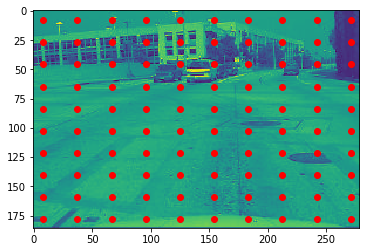

In [59]:
plt.scatter(yv, xv, c='r')
plt.imshow(img)

In [62]:
yv[0,0]

8.0

In [63]:
xv[0,0]

8.0

In [ ]:
def descriptors_hog(img, vPoints, cellWidth, cellHeight):
    nBins = 8
    w = cellWidth
    h = cellHeight

    grad_x = cv2.Sobel(img, cv2.CV_16S, dx=1, dy=0, ksize=1)
    grad_y = cv2.Sobel(img, cv2.CV_16S, dx=0, dy=1, ksize=1)

    descriptors = []  # list of descriptors for the current image, each entry is one 128-d vector for a grid point
    for i in range(len(vPoints)):
        center_x = round(vPoints[i, 0])
        center_y = round(vPoints[i, 1])

        desc = []
        for cell_y in range(-2, 2):
            for cell_x in range(-2, 2):
                start_y = center_y + (cell_y) * h
                end_y = center_y + (cell_y + 1) * h

                start_x = center_x + (cell_x) * w
                end_x = center_x + (cell_x + 1) * w

                # todo
                # compute the angles
                # compute the histogram
                ...

            descriptors.append(desc)

    descriptors = np.asarray(descriptors) # [nPointsX*nPointsY, 128], descriptor for the current image (100 grid points)
    return descriptors

In [114]:
# def descriptors_hog(img, vPoints, cellWidth, cellHeight):
img
vPoints = vpoints
cellWidth = 4
cellHeight = 4

nPointsX = 10
nPointsY = 10
border = 8

    
nBins = 8
w = cellWidth
h = cellHeight

grad_x = cv2.Sobel(img, cv2.CV_16S, dx=1, dy=0, ksize=1)
grad_y = cv2.Sobel(img, cv2.CV_16S, dx=0, dy=1, ksize=1)

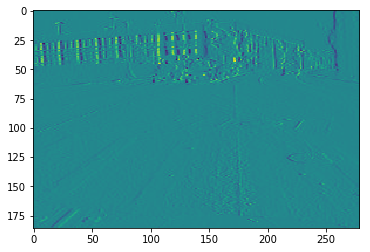

In [117]:
plt.imshow(grad_x)

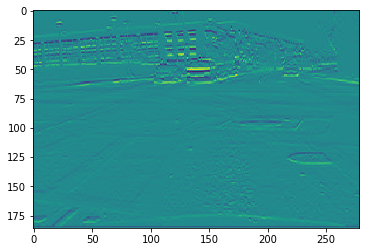

In [118]:
plt.imshow(grad_y)

In [124]:
eps = 1e-5
theta = np.arctan(grad_y/(grad_x + eps))
theta = np.abs(theta)

bins = np.linspace(0, np.pi, 8)
np.histogram(theta[:4,:4], bins)

In [128]:
theta

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16514895, 1.19029167,
        1.57079383],
       [1.57078633, 1.57078633, 1.57078633, ..., 0.46364828, 0.86217088,
        1.57079299],
       ...,
       [0.        , 1.24904727, 1.16590575, ..., 1.24904615, 0.55859988,
        1.57079299],
       [1.57079618, 1.55746392, 1.37631636, ..., 1.44209971, 1.34399733,
        1.57079617],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [129]:
print(theta.max())
print(theta.min())

1.5707962747115634
0.0


In [132]:
bins = np.linspace(0, np.pi, 8)
np.histogram(theta[:4,:4], bins)

(array([8, 0, 0, 8, 0, 0, 0]),
 array([0.        , 0.44879895, 0.8975979 , 1.34639685, 1.7951958 ,
        2.24399475, 2.6927937 , 3.14159265]))

In [133]:
theta[:4,:4]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [1.57078633, 1.57078633, 1.57078633, 1.57078633],
       [1.57078633, 1.57078633, 1.57078633, 1.57078633]])

In [136]:
theta[14:18,14:18]

array([[0.        , 0.        , 0.63274915, 1.10714922],
       [1.57078633, 0.58800107, 0.58800299, 1.42889997],
       [1.0303783 , 1.40564603, 1.46013801, 0.85196704],
       [1.32582002, 1.24904877, 1.29249535, 1.37339884]])

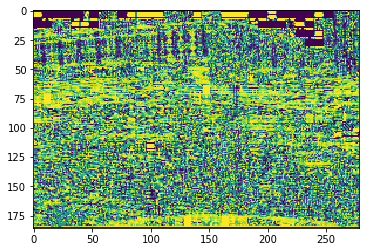

In [127]:
plt.imshow(theta)

In [137]:
np.histogram(theta[start_x:end_x, start_y:end_y], bins)

NameError: name 'start_x' is not defined

In [172]:
bins

array([0.        , 0.44879895, 0.8975979 , 1.34639685, 1.7951958 ,
       2.24399475, 2.6927937 , 3.14159265])

In [179]:

eps = 1e-5
theta = np.arctan(grad_y/(grad_x + eps))
theta = np.abs(theta)

bins = np.linspace(0, np.pi, 9)


descriptors = []  # list of descriptors for the current image, each entry is one 128-d vector for a grid point
for i in range(len(vPoints)):
    center_x = round(vPoints[i, 0])
    center_y = round(vPoints[i, 1])

    desc = []
    for cell_y in range(-2, 2):
        for cell_x in range(-2, 2):
            start_y = center_y + (cell_y) * h
            end_y = center_y + (cell_y + 1) * h

            start_x = center_x + (cell_x) * w
            end_x = center_x + (cell_x + 1) * w
            
            start_x = int(start_x)
            end_x = int(end_x)
            start_y = int(start_y)
            end_y = int(end_y)
            
            hist, _ = np.histogram(theta[start_x:end_x, start_y:end_y], bins)
            desc.append(hist)

    desc = np.concatenate(desc, 0)
    descriptors.append(np.expand_dims(desc, 0))
descriptors = np.concatenate(descriptors, 0)

In [180]:
descriptors.shape

(100, 128)

In [177]:
hist

array([4, 3, 1, 8, 0, 0, 0, 0])

In [178]:
np.concatenate(descriptors, 0).shape

(100, 128)

In [163]:
vpoints.shape

(100, 2)

In [144]:
hist , _ = np.histogram(theta[start_x:end_x, start_y:end_y], bins)

In [151]:
np.concatenate([hist, hist, hist, hist,], 0).shape

(28,)

In [143]:
theta[start_x:end_x, start_y:end_y]

array([[0.64350231, 0.51914673, 0.785399  , 1.5707949 ],
       [1.44109422, 1.24904615, 0.55859988, 1.57079299],
       [1.45230649, 1.44209971, 1.34399733, 1.57079617],
       [0.        , 0.        , 0.        , 0.        ]])

In [181]:
def descriptors_hog(img, vPoints, cellWidth, cellHeight):
    nBins = 8
    w = cellWidth
    h = cellHeight

    grad_x = cv2.Sobel(img, cv2.CV_16S, dx=1, dy=0, ksize=1)
    grad_y = cv2.Sobel(img, cv2.CV_16S, dx=0, dy=1, ksize=1)


    eps = 1e-5
    theta = np.arctan(grad_y/(grad_x + eps))
    theta = np.abs(theta)

    bins = np.linspace(0, np.pi, 9)


    descriptors = []  # list of descriptors for the current image, each entry is one 128-d vector for a grid point
    for i in range(len(vPoints)):
        center_x = round(vPoints[i, 0])
        center_y = round(vPoints[i, 1])

        desc = []
        for cell_y in range(-2, 2):
            for cell_x in range(-2, 2):
                start_y = center_y + (cell_y) * h
                end_y = center_y + (cell_y + 1) * h

                start_x = center_x + (cell_x) * w
                end_x = center_x + (cell_x + 1) * w
                
                start_x = int(start_x)
                end_x = int(end_x)
                start_y = int(start_y)
                end_y = int(end_y)
                
                hist, _ = np.histogram(theta[start_x:end_x, start_y:end_y], bins)
                desc.append(hist)

        desc = np.concatenate(desc, 0)
        descriptors.append(np.expand_dims(desc, 0))

    descriptors = np.concatenate(descriptors, 0)
    
    descriptors = np.asarray(descriptors) # [nPointsX*nPointsY, 128], descriptor for the current image (100 grid points)
    return descriptors

In [183]:
descriptors_hog(img, vPoints, cellWidth, cellHeight).shape

(100, 128)

In [224]:
# def create_codebook(nameDirPos, nameDirNeg, k, numiter):
"""
:param nameDirPos: dir to positive training images
:param nameDirNeg: dir to negative training images
:param k: number of kmeans cluster centers
:param numiter: maximum iteration numbers for kmeans clustering
:return: vCenters: center of kmeans clusters, numpy array, [k, 128]
"""
vImgNames = sorted(glob.glob(os.path.join(nameDirPos, '*.png')))
vImgNames = vImgNames + sorted(glob.glob(os.path.join(nameDirNeg, '*.png')))

nImgs = len(vImgNames)

cellWidth = 4
cellHeight = 4
nPointsX = 10
nPointsY = 10
border = 8

vFeatures = []  # list for all features of all images (each feature: 128-d, 16 histograms containing 8 bins)
# Extract features for all image
for i in tqdm(range(nImgs)):
    # print('processing image {} ...'.format(i+1))
    img = cv2.imread(vImgNames[i])  # [172, 208, 3]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # [h, w]

    # Collect local feature points for each image, and compute a descriptor for each local feature point
    # todo
    ...
    vPoints = grid_points(img, nPointsX, nPointsY, border)
    vf = descriptors_hog(img, vPoints, cellWidth, cellHeight)
    vFeatures.append(vf)



100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


In [231]:
len(vFeatures)

100

In [232]:
nImgs

100

In [228]:
vFeatures[0].shape

(100, 128)

In [230]:
np.concatenate(np.expand_dims(vFeatures,0),0).shape

(100, 100, 128)

In [233]:
np.asarray(vFeatures).shape

(100, 100, 128)

In [193]:


vFeatures = np.asarray(vFeatures)  # [n_imgs, n_vPoints, 128]
vFeatures = vFeatures.reshape(-1, vFeatures.shape[-1])  # [n_imgs*n_vPoints, 128]
print('number of extracted features: ', len(vFeatures))

number of extracted features:  10000


In [195]:
vFeatures.shape

(10000, 128)

In [208]:
k = 20
numiter = 500

In [209]:
# Cluster the features using K-Means
print('clustering ...')
kmeans_res = KMeans(n_clusters=k, max_iter=numiter).fit(vFeatures)
vCenters = kmeans_res.cluster_centers_  # [k, 128]
# return vCenters

clustering ...


In [207]:
vCenters.shape

(20, 128)

In [190]:
features.shape

(100, 128)

In [210]:
def create_codebook(nameDirPos, nameDirNeg, k, numiter):
    """
    :param nameDirPos: dir to positive training images
    :param nameDirNeg: dir to negative training images
    :param k: number of kmeans cluster centers
    :param numiter: maximum iteration numbers for kmeans clustering
    :return: vCenters: center of kmeans clusters, numpy array, [k, 128]
    """
    vImgNames = sorted(glob.glob(os.path.join(nameDirPos, '*.png')))
    vImgNames = vImgNames + sorted(glob.glob(os.path.join(nameDirNeg, '*.png')))

    nImgs = len(vImgNames)

    cellWidth = 4
    cellHeight = 4
    nPointsX = 10
    nPointsY = 10
    border = 8

    vFeatures = []  # list for all features of all images (each feature: 128-d, 16 histograms containing 8 bins)
    # Extract features for all image
    for i in tqdm(range(nImgs)):
        # print('processing image {} ...'.format(i+1))
        img = cv2.imread(vImgNames[i])  # [172, 208, 3]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # [h, w]

        # Collect local feature points for each image, and compute a descriptor for each local feature point
        # todo
        ...
        vPoints = grid_points(img, nPointsX, nPointsY, border)
        vf = descriptors_hog(img, vPoints, cellWidth, cellHeight)
        vFeatures.append(vf)


    vFeatures = np.asarray(vFeatures)  # [n_imgs, n_vPoints, 128]
    vFeatures = vFeatures.reshape(-1, vFeatures.shape[-1])  # [n_imgs*n_vPoints, 128]
    print('number of extracted features: ', len(vFeatures))


    # Cluster the features using K-Means
    print('clustering ...')
    kmeans_res = KMeans(n_clusters=k, max_iter=numiter).fit(vFeatures)
    vCenters = kmeans_res.cluster_centers_  # [k, 128]
    return vCenters

In [213]:
create_codebook(nameDirPos, nameDirNeg, k=20, numiter=100)

100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


number of extracted features:  10000
clustering ...


array([[3.96052632, 3.01315789, 3.6622807 , ..., 0.        , 0.        ,
        0.        ],
       [0.23454158, 0.0533049 , 0.06609808, ..., 0.        , 0.        ,
        0.        ],
       [2.37297297, 2.25135135, 3.51351351, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [6.00664452, 3.75415282, 2.82059801, ..., 0.        , 0.        ,
        0.        ],
       [1.13137255, 1.50784314, 2.85490196, ..., 0.        , 0.        ,
        0.        ],
       [3.92339545, 3.4057971 , 3.62732919, ..., 0.        , 0.        ,
        0.        ]])

In [299]:
def bow_histogram(vFeatures, vCenters):
    """
    :param vFeatures: MxD matrix containing M feature vectors of dim. D
    :param vCenters: NxD matrix containing N cluster centers of dim. D
    :return: histo: N-dim. numpy vector containing the resulting BoW activation histogram.
    """
    histo = None

    # todo
    ...
    nns, dist = findnn(vFeatures, vCenters)
    k = vCenters.shape[0]
    bins = np.linspace(0, k-1, k+1)
    
    histo, _ = np.histogram(nns, bins)

    return histo

In [300]:
for vf in vFeatures:
    d = bow_histogram(vf, vCenters)

In [301]:
d.shape

(20,)

In [303]:
bow_histogram(vFeatures[0], vCenters)

array([ 0,  0,  2,  4,  1,  2, 12,  0,  2,  0, 44,  2,  2,  1,  5,  8,  3,
        0, 10,  2])

In [237]:
len(vFeatures)

100

In [241]:
vFeatures[0].shape

(100, 128)

In [242]:
vCenters.shape

(20, 128)

In [258]:
nns = findnn(vFeatures[0], vCenters)
k = vCenters.shape[0]
bins = np.linspace(0, k-1, k+1)
hist, _ = np.histogram(nns[0], bins)

In [289]:
k

20

In [320]:
vFeatures[0].shape

(100, 128)

In [321]:
vCenters.shape

(20, 128)

In [317]:
nns = findnn(vFeatures[0], vCenters)

In [322]:
len(nns[0])

100

In [285]:
bins

array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
        8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
       17.1 , 18.05, 19.  ])

In [286]:
hist.shape

(20,)

In [287]:
hist

array([ 0,  0,  2,  4,  1,  2, 12,  0,  2,  0, 44,  2,  2,  1,  5,  8,  3,
        0, 10,  2])

In [288]:
[np.sum(np.array(nns[0])==i) for i in range(k)]

[0, 0, 2, 4, 1, 2, 12, 0, 2, 0, 44, 2, 2, 1, 5, 8, 3, 0, 10, 2]

In [275]:
k

20

In [252]:
len(nns[0])

100

In [255]:
print(np.array(nns[0]).min())
print(np.array(nns[0]).max())

2
19


In [250]:
nns[1]

[18.70946759069942,
 15.951597611268129,
 16.83865299250803,
 15.725538804034226,
 16.777915814990877,
 20.841696624813192,
 13.081881148842994,
 16.326336311410053,
 0.5069231033629541,
 0.5069231033629541,
 19.102834023374868,
 14.493376102682594,
 16.862650060933618,
 17.937669627633838,
 17.584151324920622,
 17.340903391854983,
 13.122019969935215,
 16.47224982524662,
 0.5069231033629541,
 0.5069231033629541,
 18.705911039563773,
 18.604107632006556,
 20.61650427364244,
 17.231913325564065,
 11.775975708400644,
 15.877618435405909,
 15.668009518837495,
 16.492446998449566,
 0.5069231033629541,
 0.5069231033629541,
 19.359697833683548,
 17.06958777995279,
 14.910461120731227,
 10.793256802990843,
 13.420673012181473,
 18.476482093394264,
 14.849875154592146,
 16.636496952010752,
 0.5069231033629541,
 0.5069231033629541,
 14.132316262485293,
 20.765181625194852,
 21.36446488126443,
 18.961032182471282,
 11.448800704728795,
 18.530526161806705,
 17.86576219403023,
 19.29737192207034,


In [244]:
len(nns[0])

100

In [222]:
len(nns[1])

10000

In [223]:
vFeatures.shape

(10000, 128)

In [305]:
nameDir = nameDirPos

In [313]:
def create_bow_histograms(nameDir, vCenters):
    """
    :param nameDir: dir of input images
    :param vCenters: kmeans cluster centers, [k, 128] (k is the number of cluster centers)
    :return: vBoW: matrix, [n_imgs, k]
    """
    vImgNames = sorted(glob.glob(os.path.join(nameDir, '*.png')))
    nImgs = len(vImgNames)

    cellWidth = 4
    cellHeight = 4
    nPointsX = 10
    nPointsY = 10
    border = 8

    # Extract features for all images in the given directory
    vBoW = []
    for i in tqdm(range(nImgs)):
        # print('processing image {} ...'.format(i + 1))
        img = cv2.imread(vImgNames[i])  # [172, 208, 3]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # [h, w]

        # todo
        vPoints = grid_points(img, nPointsX, nPointsY, border)
        vf = descriptors_hog(img, vPoints, cellWidth, cellHeight)
        vBoW.append(bow_histogram(vf, vCenters))


    vBoW = np.asarray(vBoW)  # [n_imgs, k]
    return vBoW

In [314]:
vBow = create_bow_histograms(nameDir, vCenters)

100%|██████████| 50/50 [00:03<00:00, 14.13it/s]


In [315]:
vBoW.shape

(50, 20)

In [316]:
vf.shape

(100, 128)

In [323]:
a = bow_histogram(vf, vCenters)

In [330]:
a = a.reshape(1,a.shape[0])

In [333]:
findnn(a, np.array([a,a]))[0]

[0]

In [65]:
nameDirPos_train = 'data/data_bow/cars-training-pos'
nameDirNeg_train = 'data/data_bow/cars-training-neg'
nameDirPos_test = 'data/data_bow/cars-testing-pos'
nameDirNeg_test = 'data/data_bow/cars-testing-neg'


k = None  # todo
numiter = None  # todo

print('creating codebook ...')
vCenters = create_codebook(nameDirPos_train, nameDirNeg_train, k, numiter)



creating codebook ...


NameError: name 'create_codebook' is not defined

In [ ]:
nameDirPos = nameDirPos_train
nameDirNeg = nameDirNeg_train

In [66]:

sift = cv2.SIFT_create()
kp = sift.detect(img,None)

In [67]:
kp[0].__dir__()

['__repr__',
 '__init__',
 '__new__',
 'convert',
 'overlap',
 'angle',
 'class_id',
 'octave',
 'pt',
 'response',
 'size',
 '__doc__',
 '__module__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [68]:
kp[0].pt

(4.8148627281188965, 182.3683624267578)

In [69]:
import matplotlib.pyplot as plt

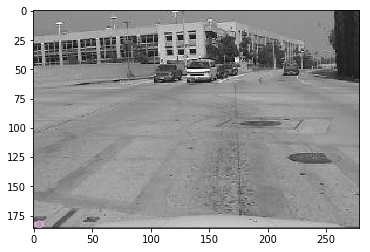

In [70]:
plt.imshow(cv2.drawKeypoints(img,[kp[0]],img))

In [71]:
img.shape

(186, 279)

In [72]:
vImgNames = sorted(glob.glob(os.path.join(nameDirPos, '*.png')))
vImgNames = vImgNames + sorted(glob.glob(os.path.join(nameDirNeg, '*.png')))

nImgs = len(vImgNames)

cellWidth = 4
cellHeight = 4
nPointsX = 10
nPointsY = 10
border = 8

vFeatures = []  # list for all features of all images (each feature: 128-d, 16 histograms containing 8 bins)
# Extract features for all image
for i in tqdm(range(nImgs)):
    # print('processing image {} ...'.format(i+1))
    img = cv2.imread(vImgNames[i])  # [172, 208, 3]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # [h, w]

    # Collect local feature points for each image, and compute a descriptor for each local feature point
    # todo
    ...


vFeatures = np.asarray(vFeatures)  # [n_imgs, n_vPoints, 128]
vFeatures = vFeatures.reshape(-1, vFeatures.shape[-1])  # [n_imgs*n_vPoints, 128]
print('number of extracted features: ', len(vFeatures))


# Cluster the features using K-Means
print('clustering ...')
kmeans_res = KMeans(n_clusters=k, max_iter=numiter).fit(vFeatures)
vCenters = kmeans_res.cluster_centers_  # [k, 128]

100%|██████████| 100/100 [00:00<00:00, 442.32it/s]


ValueError: cannot reshape array of size 0 into shape (0)

In [ ]:
print('creating bow histograms (pos) ...')
vBoWPos = create_bow_histograms(nameDirPos_train, vCenters)
print('creating bow histograms (neg) ...')
vBoWNeg = create_bow_histograms(nameDirNeg_train, vCenters)

# test pos samples
print('creating bow histograms for test set (pos) ...')
vBoWPos_test = create_bow_histograms(nameDirPos_test, vCenters)  # [n_imgs, k]
result_pos = 0
print('testing pos samples ...')
for i in range(vBoWPos_test.shape[0]):
    cur_label = bow_recognition_nearest(vBoWPos_test[i:(i+1)], vBoWPos, vBoWNeg)
    result_pos = result_pos + cur_label
acc_pos = result_pos / vBoWPos_test.shape[0]
print('test pos sample accuracy:', acc_pos)

# test neg samples
print('creating bow histograms for test set (neg) ...')
vBoWNeg_test = create_bow_histograms(nameDirNeg_test, vCenters)  # [n_imgs, k]
result_neg = 0
print('testing neg samples ...')
for i in range(vBoWNeg_test.shape[0]):
    cur_label = bow_recognition_nearest(vBoWNeg_test[i:(i + 1)], vBoWPos, vBoWNeg)
    result_neg = result_neg + cur_label
acc_neg = 1 - result_neg / vBoWNeg_test.shape[0]
print('test neg sample accuracy:', acc_neg)